<a href="https://colab.research.google.com/github/ccollado7/proyecto_vocales/blob/main/k_means_vocales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [137]:
!git clone https://github.com/ccollado7/proyecto_vocales.git

Cloning into 'proyecto_vocales'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 40 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


Leer archivos y armar el dataset

In [141]:
!cd 'proyecto_vocales/data/raw/'

In [81]:
vocales=['A','E','I','O','U']

df=pd.DataFrame()                     
for vocal in vocales:
  df1=pd.read_csv('features_'+vocal+'.csv',header=None)
  df1['target']=vocal
  df=pd.concat([df, df1], axis=0).reset_index(drop=True)

In [142]:
df

,0,1,target
0,1002.20,1549.30,A
1,961.18,1440.70,A
2,810.06,1250.70,A
3,779.54,1214.80,A
4,948.24,1506.80,A
...,...,...,...
56,342.04,763.67,U
57,305.18,736.57,U
58,306.88,671.88,U
59,323.97,705.57,U


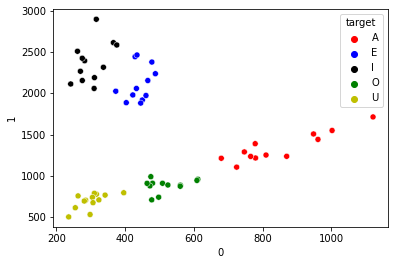

In [85]:
sns.scatterplot(x=0,y=1,hue='target',palette={'A':'r','E':'b','I':'k','O':'g','U':'y'},data=df,legend='brief')

Método kmeans

In [86]:
from sklearn.cluster import KMeans

In [109]:
X=df[[0,1]]

In [111]:
y=df[['target']]

In [112]:
kmeans = KMeans(n_clusters=5).fit(X)

In [130]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[3 3 3 3 3 3 0 3 3 3 3 3 1 4 4 4 1 4 4 4 4 4 4 1 1 1 1 4 1 4 4 1 1 1 4 1 0
 0 0 0 0 0 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[ 544.76727273  930.04454545]
 [ 347.98909091 2484.05454545]
 [ 326.496       697.21733333]
 [ 860.32545455 1366.77272727]
 [ 390.96384615 2050.04615385]]


([], <a list of 0 Text major ticklabel objects>)

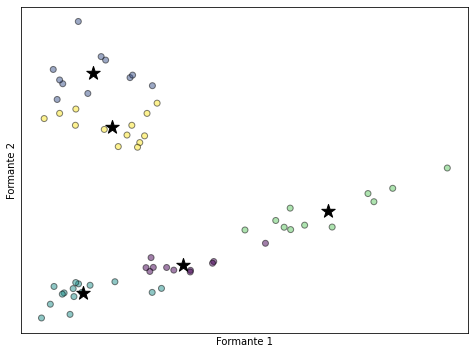

In [131]:
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(X[0], X[1],c=kmeans.labels_, alpha=.5, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('Formante 1')
plt.ylabel('Formante 2')
plt.xticks(())
plt.yticks(())

Análisis de clusters